# Logistic Regression

<img src="https://raw.githubusercontent.com/GokuMohandas/practicalAI/master/images/logo.png" width=150>

In the previous lesson, we saw how linear regression works really well for predicting continuous outputs that can easily fit to a line/plane. But linear regression doesn't fare well for classification asks where we want to probabilititcally determine the outcome for a given set on inputs.





# Overview

<img src="https://raw.githubusercontent.com/GokuMohandas/practicalAI/master/images/logistic.jpg" width=270>

$ \hat{y} = \frac{1}{1 + e^{-XW}} $ 

*where*:
* $\hat{y}$ = prediction | $\in \mathbb{R}^{NX1}$ ($N$ is the number of samples)
* $X$ = inputs | $\in \mathbb{R}^{NXD}$ ($D$ is the number of features)
* $W$ = weights | $\in \mathbb{R}^{DX1}$ 

This is the binomial logistic regression. The main idea is to take the outputs from the linear equation ($z=XW$) and use the sigmoid (logistic) function ($\frac{1}{1+e^{-z}}$) to restrict the value between (0, 1). 

When we have more than two classes, we need to use multinomial logistic regression (softmax classifier). The softmax classifier will use the linear equation ($z=XW$) and normalize it to product the probabiltiy for class y given the inputs.

$ \hat{y} = \frac{e^{XW_y}}{\sum e^{XW}} $ 

*where*:
* $\hat{y}$ = prediction | $\in \mathbb{R}^{NX1}$ ($N$ is the number of samples)
* $X$ = inputs | $\in \mathbb{R}^{NXD}$ ($D$ is the number of features)
* $W$ = weights | $\in \mathbb{R}^{DXC}$ ($C$ is the number of classes)


* **Objective:**  Predict the probability of class $y$ given the inputs $X$. The softmax classifier normalizes the linear outputs to determine class probabilities. 
* **Advantages:**
  * Can predict class probabilities given a set on inputs.
* **Disadvantages:**
  * Sensitive to outliers since objective is minimize cross entropy loss. (Support vector machines ([SVMs](https://towardsdatascience.com/support-vector-machine-vs-logistic-regression-94cc2975433f)) are a good alternative to counter outliers).
* **Miscellaneous:** Softmax classifier is going to used widely in neural network architectures as the last layer since it produces class probabilities.

# Training

*Steps*:

1. Randomly initialize the model's weights $W$.
2. Feed inputs $X$ into the model to receive the logits ($z=XW$). Apply the softmax operation on the logits to get the class probabilies $\hat{y}$ in one-hot encoded form. For example, if there are three classes, the predicted class probabilities could look like [0.3, 0.3, 0.4]. 
3. Compare the predictions $\hat{y}$ (ex.  [0.3, 0.3, 0.4]]) with the actual target values $y$ (ex. class 2 would look like [0, 0, 1]) with the objective (cost) function to determine loss $J$. A common objective function for logistics regression is cross-entropy loss. 
  * $J(\theta) = - \sum_i y_i ln (\hat{y_i}) =  - \sum_i y_i ln (\frac{e^{X_iW_y}}{\sum e^{X_iW}}) $
   * $y$ = [0, 0, 1]
  * $\hat{y}$ = [0.3, 0.3, 0.4]]
  * $J(\theta) = - \sum_i y_i ln (\hat{y_i}) =  - \sum_i y_i ln (\frac{e^{X_iW_y}}{\sum e^{X_iW}}) = - \sum_i [0 * ln(0.3) + 0 * ln(0.3) + 1 * ln(0.4)] = -ln(0.4) $
  * This simplifies our cross entropy objective to the following: $J(\theta) = - ln(\hat{y_i})$ (negative log likelihood).
  * $J(\theta) = - ln(\hat{y_i}) = - ln (\frac{e^{X_iW_y}}{\sum_i e^{X_iW}}) $
4. Calculate the gradient of loss $J(\theta)$ w.r.t to the model weights. Let's assume that our classes are mutually exclusive (a set of inputs could only belong to one class).
 * $\frac{\partial{J}}{\partial{W_j}} = \frac{\partial{J}}{\partial{y}}\frac{\partial{y}}{\partial{W_j}} = - \frac{1}{y}\frac{\partial{y}}{\partial{W_j}} = - \frac{1}{\frac{e^{W_yX}}{\sum e^{XW}}}\frac{\sum e^{XW}e^{W_yX}0 - e^{W_yX}e^{W_jX}X}{(\sum e^{XW})^2} = \frac{Xe^{W_j}X}{\sum e^{XW}} = XP$
  * $\frac{\partial{J}}{\partial{W_y}} = \frac{\partial{J}}{\partial{y}}\frac{\partial{y}}{\partial{W_y}} = - \frac{1}{y}\frac{\partial{y}}{\partial{W_y}} = - \frac{1}{\frac{e^{W_yX}}{\sum e^{XW}}}\frac{\sum e^{XW}e^{W_yX}X - e^{W_yX}e^{W_yX}X}{(\sum e^{XW})^2} = \frac{1}{P}(XP - XP^2) = X(P-1)$
5. Apply backpropagation to update the weights $W$ using gradient descent. The updates will penalize the probabiltiy for the incorrect classes (j) and encourage a higher probability for the correct class (y).
  * $W_i = W_i - \alpha\frac{\partial{J}}{\partial{W_i}}$
6. Repeat steps 2 - 4 until model performs well.

# Data

We're going to the load the titanic dataset we looked at in lesson 03_Pandas.

In [0]:
from argparse import Namespace
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import urllib

In [0]:
# Arguments
args = Namespace(
    seed=1234,
    data_file="titanic.csv",
    train_size=0.75,
    test_size=0.25,
    num_epochs=100,
)

# Set seed for reproducability
np.random.seed(args.seed)

In [0]:
# Upload data from GitHub to notebook's local drive
url = "https://raw.githubusercontent.com/GokuMohandas/practicalAI/master/data/titanic.csv"
response = urllib.request.urlopen(url)
html = response.read()
with open(args.data_file, 'wb') as f:
    f.write(html)

In [0]:
# Read from CSV to Pandas DataFrame
df = pd.read_csv(args.data_file, header=0)
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


# Scikit-learn implementation

**Note**: The `LogisticRegression` class in Scikit-learn uses coordinate descent to solve the fit. However, we are going to use Scikit-learn's `SGDClassifier` class which uses stochastic gradient descent. We want to use this optimization approach because we will be using this for the models in subsequent lessons.

In [0]:
# Import packages
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [0]:
# Preprocessing
def preprocess(df):
  
    # Drop rows with NaN values
    df = df.dropna()

    # Drop text based features (we'll learn how to use them in later lessons)
    features_to_drop = ["name", "cabin", "ticket"]
    df = df.drop(features_to_drop, axis=1)

    # pclass, sex, and embarked are categorical features
    categorical_features = ["pclass","embarked","sex"]
    df = pd.get_dummies(df, columns=categorical_features)

    return df

In [0]:
# Preprocess the dataset
df = preprocess(df)
df.head()

,age,sibsp,parch,fare,survived,pclass_1,pclass_2,pclass_3,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,29.0000,0,0,211.3375,1,1,0,0,0,0,1,1,0
1,0.9167,1,2,151.5500,1,1,0,0,0,0,1,0,1
2,2.0000,1,2,151.5500,0,1,0,0,0,0,1,1,0
3,30.0000,1,2,151.5500,0,1,0,0,0,0,1,0,1
4,25.0000,1,2,151.5500,0,1,0,0,0,0,1,1,0


In [0]:
# Split the data
mask = np.random.rand(len(df)) < args.train_size
train_df = df[mask]
test_df = df[~mask]
print ("Train size: {0}, test size: {1}".format(len(train_df), len(test_df)))

Train size: 199, test size: 71


**Note**: If you have preprocessing steps like standardization, etc. that are calculated, you need to separate the training and test set first before spplying those operations. This is because we cannot apply any knowledge gained from the test set accidentally during preprocessing/training.

In [0]:
# Separate X and y
X_train = train_df.drop(["survived"], axis=1)
y_train = train_df["survived"]
X_test = test_df.drop(["survived"], axis=1)
y_test = test_df["survived"]

In [0]:
# Standardize the data (mean=0, std=1) using training data
X_scaler = StandardScaler().fit(X_train)

# Apply scaler on training and test data (don't standardize outputs for classification)
standardized_X_train = X_scaler.transform(X_train)
standardized_X_test = X_scaler.transform(X_test)

# Check
print ("mean:", np.mean(standardized_X_train, axis=0)) # mean should be ~0
print ("std:", np.std(standardized_X_train, axis=0))   # std should be 1

mean: [-1.78528326e-17  7.14113302e-17 -5.80217058e-17 -5.35584977e-17
  3.57056651e-17 -8.92641628e-17  3.57056651e-17 -3.79372692e-17
  0.00000000e+00  3.79372692e-17  1.04885391e-16 -6.69481221e-17]
std: [1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.]


In [0]:
# Initialize the model
log_reg = SGDClassifier(loss="log", penalty="none", max_iter=args.num_epochs, 
                        random_state=args.seed)

In [0]:
# Train
log_reg.fit(X=standardized_X_train, y=y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=100, n_iter=None,
       n_jobs=1, penalty='none', power_t=0.5, random_state=1234,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [0]:
# Probabilities
pred_test = log_reg.predict_proba(standardized_X_test)
print (pred_test[:5])

[[0.60319594 0.39680406]
 [0.00374908 0.99625092]
 [0.81886302 0.18113698]
 [0.01082253 0.98917747]
 [0.93508814 0.06491186]]


In [0]:
# Predictions (unstandardize them)
pred_train = log_reg.predict(standardized_X_train) 
pred_test = log_reg.predict(standardized_X_test)
print (pred_test)

[0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0
 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]


# Evaluation metrics

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
# Accuracy
train_acc = accuracy_score(y_train, pred_train)
test_acc = accuracy_score(y_test, pred_test)
print ("train acc: {0:.2f}, test acc: {1:.2f}".format(train_acc, test_acc))

train acc: 0.77, test acc: 0.82


So far we looked at accuracy as the metric that determines our mode's level of performance. But we have several other options when it comes to  evaluation metrics.

<img src="https://raw.githubusercontent.com/GokuMohandas/practicalAI/master/images/metrics.jpg" width=400>

The metric we choose really depends on the situation.
positive - true, 1, tumor, issue, etc., negative - false, 0, not tumor, not issue, etc.

$\text{accuracy} = \frac{TP+TN}{TP+TN+FP+FN}$ 

$\text{recall} = \frac{TP}{TP+FN}$ → (how many of the actual issues did I actually catch)

$\text{precision} = \frac{TP}{TP+FP}$ → (out of all the things I said were issues, how many were actually issues)

$F_1 = 2 * \frac{\text{precision }  *  \text{ recall}}{\text{precision } + \text{ recall}}$

where: 
* TP: # of samples predicted to be positive and were actually positive
* TN: # of samples predicted to be negative and were actually negative
* FP: # of samples predicted to be positive but were actually negative
* FN: # of samples predicted to be negative but were actually positive

In [0]:
import itertools
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
# Plot confusion matrix
def plot_confusion_matrix(cm, classes):
    cmap=plt.cm.Blues
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.grid(False)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

             precision    recall  f1-score   support

          0       0.74      0.91      0.82        32
          1       0.91      0.74      0.82        39

avg / total       0.83      0.82      0.82        71



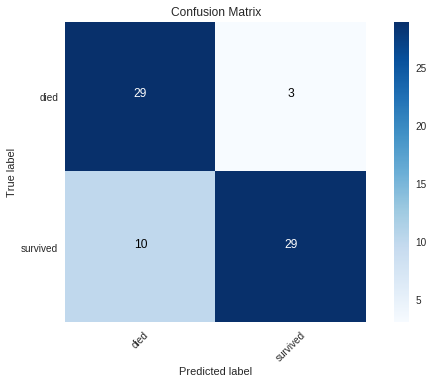

In [0]:
# Confusion matrix
cm = confusion_matrix(y_test, pred_test)
plot_confusion_matrix(cm=cm, classes=["died", "survived"])
print (classification_report(y_test, pred_test))

When we have more than two labels (binary), we have options to calculate the evaluation metrics at a micro/macro level (per clas label), weighted, etc. You can find out more by looking at the [offical docs](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html).

# Inference

Now let's see if you would've survived the titanic.

In [0]:
# Input your information
X_infer = pd.DataFrame([{"name": "Goku Mohandas", "cabin": "E", "ticket": "E44", 
                         "pclass": 1, "age": 24, "sibsp": 1, "parch": 2, 
                         "fare": 100, "embarked": "C", "sex": "male"}])
X_infer.head()

,age,cabin,embarked,fare,name,parch,pclass,sex,sibsp,ticket
0,24,E,C,100,Goku Mohandas,2,1,male,1,E44


In [0]:
# Apply preprocessing
X_infer = preprocess(X_infer)
X_infer.head()

,age,fare,parch,sibsp,pclass_1,embarked_C,sex_male
0,24,100,2,1,1,1,1


In [0]:
# Add missing columns
missing_features = set(X_test.columns) - set(X_infer.columns)
for feature in missing_features:
    X_infer[feature] = 0

# Reorganize header
X_infer = X_infer[X_train.columns]
X_infer.head()

,age,sibsp,parch,fare,pclass_1,pclass_2,pclass_3,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,24,1,2,100,1,0,0,1,0,0,0,1


In [0]:
# Standardize
standardized_X_infer = X_scaler.transform(X_infer)

In [0]:
# Predict
y_infer = log_reg.predict_proba(standardized_X_infer)
classes = {0: "died", 1: "survived"}
_class = np.argmax(y_infer)
print ("Looks like I would've {0} with about {1:.0f}% probability on the Titanic expedition!".format(
    classes[_class], y_infer[0][_class]*100.0))

Looks like I would've survived with about 57% probability on the Titanic expedition!


# Interpretability

Which of the features are most influential?

In [0]:
# Unstandardize coefficients 
coef = log_reg.coef_ / X_scaler.scale_
intercept = log_reg.intercept_ - np.sum((coef * X_scaler.mean_))
print (coef)
print (intercept)

[[-0.02155712  0.39758992  0.78341184 -0.0070509  -2.71953415  2.01530102
   3.50708962  0.11008796  0.         -0.11008796  2.94675085 -2.94675085]]
[5.10843738]


A positive coefficient signifies correlation with the positive class (1=survived) and a negative coefficient signifies correlation with the negative class (0=died).

In [0]:
indices = np.argsort(coef)
features = list(X_train.columns)
print ("Features correlated with death:", [features[i] for i in indices[0][:3]])
print ("Features correlated with survival:", [features[i] for i in indices[0][-3:]])

Features correlated with death: ['sex_male', 'pclass_1', 'embarked_S']
Features correlated with survival: ['pclass_2', 'sex_female', 'pclass_3']


### Proof for unstandardizing coefficients:



Note that only X was standardized.

$\mathbb{E}[y] = W_0 + \sum_{j=1}^{k}W_jz_j$

$z_j = \frac{x_j - \bar{x}_j}{\sigma_j}$

$ \hat{y} = \hat{W_0} + \sum_{j=1}^{k}\hat{W_j}z_j $

$\hat{y} = \hat{W_0} + \sum_{j=1}^{k} \hat{W}_j (\frac{x_j - \bar{x}_j}{\sigma_j}) $

$\hat{y} = (\hat{W_0} - \sum_{j=1}^{k} \hat{W}_j\frac{\bar{x}_j}{\sigma_j}) +  \sum_{j=1}^{k} (\frac{\hat{w}_j}{\sigma_j})x_j$

# K-fold cross validation

Cross validation is a resampling techniques to evaluate a model. Instead of splitting out data once at the beginning into train/val/test sets. We do this k (usually k=5 or 10) times with different training and evaluation sets.

Steps:
1.   Shuffle the *train* dataset randomly.
2.   Split the dataset into k discint groups.
3.   For each iteration k, choose one of the groups to be your test set and the rest as your training set.
4.   Repeat so that each group experiences being part of the test and train set.
5.   Train a model using randomly initialzied weights.
6.   After each iteration k, reinitialize the model with the same randomly initialzied weights and repeat on the new test set.



In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
# K-fold cross validation
log_reg = SGDClassifier(loss="log", penalty="none", max_iter=args.num_epochs)
scores = cross_val_score(log_reg, standardized_X_train, y_train, cv=10, scoring="accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

# TODO

- interaction terms
- interpreting odds ratio
- simple example with coordinate descent method (sklearn.linear_model.LogisticRegression)